In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
from os import listdir
from sklearn.preprocessing import  LabelBinarizer
from keras.preprocessing import image
from keras.utils import load_img, img_to_array, array_to_img
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
from sklearn.model_selection import train_test_split

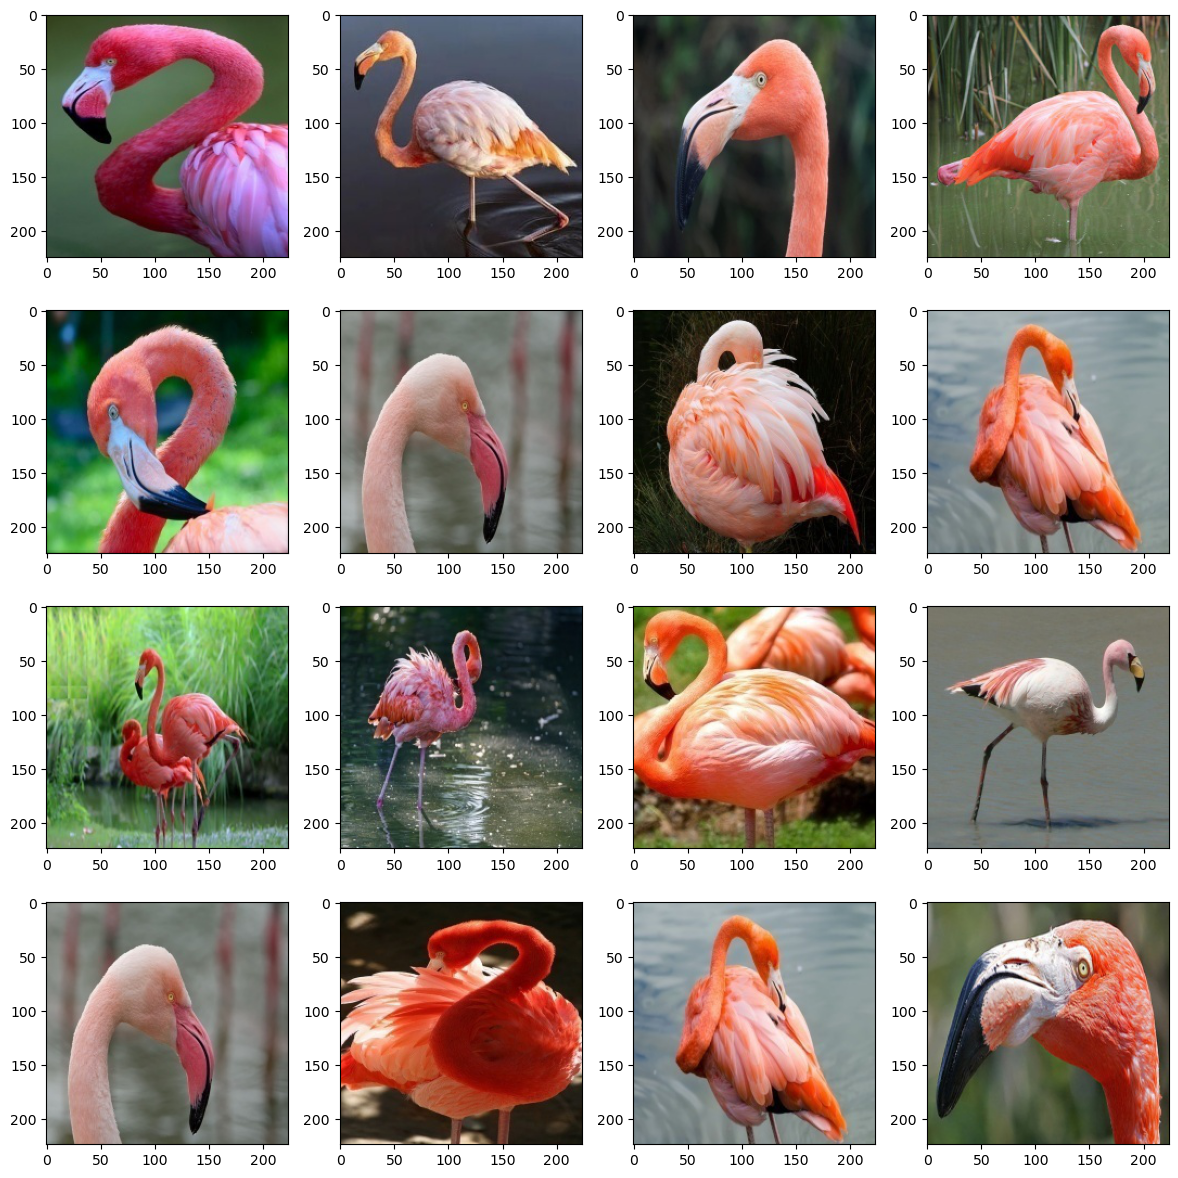

In [3]:
plt.figure(figsize=(12,12))
path = "Bird Speciees Dataset/FLAMINGO"
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img =imread(path + "/" + random.choice(sorted(listdir(path))))
    plt.imshow(rand_img)

In [4]:
dir = "Bird Speciees Dataset"
root_dir = listdir(dir)
image_list, label_list = [], [] 

In [11]:
for directory in root_dir:
    for files in listdir(f"{dir}/{directory}"):
        image_path = f"{dir}/{directory}/{files}"
        image = cv2.imread(image_path)
        image = img_to_array(image)
        image_list.append(image)
        label_list.append(directory)

In [12]:
label_count = pd.DataFrame(label_list).value_counts()
label_count

0                 
AMERICAN GOLDFINCH    143
EMPEROR PENGUIN       139
DOWNY WOODPECKER      137
FLAMINGO              132
CARMINE BEE-EATER     131
BARN OWL              129
Name: count, dtype: int64

In [13]:
num_classes = len(label_count)

In [21]:
import os

dataset_dir = "Bird Speciees Dataset"
print("Klasördeki dosyalar:", os.listdir(dataset_dir))



Klasördeki dosyalar: ['EMPEROR PENGUIN', 'CARMINE BEE-EATER', 'BARN OWL', 'DOWNY WOODPECKER', 'AMERICAN GOLDFINCH', 'FLAMINGO']


In [25]:
import os
import cv2

dataset_dir = "Bird Speciees Dataset"
image_list = []

for root, dirs, files in os.walk(dataset_dir):   # Also looks in subfolders
    for file in files:
        file_path = os.path.join(root, file)
        img = cv2.imread(file_path)
        if img is not None:
            image_list.append(img)

print("Total Picture: ", len(image_list))
print("Size of first picture: ", image_list[0].shape)


Total Picture:  811
Size of first picture:  (224, 224, 3)


In [26]:
label_list = np.array(label_list)
label_list.shape

(811,)

In [27]:
X_train, X_test, y_train, y_test =train_test_split(image_list,
                                                   label_list,
                                                   test_size= 0.2,
                                                   random_state= 9)

In [30]:
X_train = np.array(X_train, dtype= np.float16)/ 255.0
X_test = np.array(X_test, dtype=np.float16)/255.0

X_train = X_train.reshape(-1,224,224,3)
X_test = X_test.reshape(-1, 224, 224,3)

In [31]:
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)
print(lb.classes_)


[0 1 2 3 4 5]


In [32]:
X_train, X_val, y_train, y_val= train_test_split(X_train,
                                                 y_train,
                                                 test_size=0.2,
                                                 random_state=9)

In [38]:
model = Sequential()

model.add(Conv2D(8, (3,3),padding="same", input_shape=(224,224,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3)))

model.add(Conv2D(16, (3,3),padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3,3),padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

model.add(Dense(32, activation= "relu"))
model.add(Dense(num_classes, activation= "softmax"))
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 224, 224, 8)    │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 74, 74, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 74, 74, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 37, 37, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 37, 37, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 18, 18, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 10368)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │       331,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │           198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 338,038 (1.29 MB)

 Trainable params: 338,038 (1.29 MB)

 Non-trainable params: 0 (0.00 B)

In [39]:
model.compile(loss= "categorical_crossentropy",
              optimizer = Adam(0.0005),
              metrics =["accuracy"])

In [47]:
epoch = 100
batch_size = 128
history = model.fit(X_train,y_train,
                    batch_size =batch_size,
                    epochs= epoch,
                    validation_data = (X_val, y_val))

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 214ms/step - accuracy: 0.5766 - loss: 1.1087 - val_accuracy: 0.4846 - val_loss: 1.3265
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 204ms/step - accuracy: 0.5376 - loss: 1.1791 - val_accuracy: 0.4538 - val_loss: 1.4190
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 207ms/step - accuracy: 0.5354 - loss: 1.1765 - val_accuracy: 0.4462 - val_loss: 1.3636
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 213ms/step - accuracy: 0.4830 - loss: 1.2686 - val_accuracy: 0.4538 - val_loss: 1.3916
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 205ms/step - accuracy: 0.5125 - loss: 1.2050 - val_accuracy: 0.4692 - val_loss: 1.3096
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 206ms/step - accuracy: 0.5554 - loss: 1.1489 - val_accuracy: 0.5231 - val_loss: 1.2870
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 222ms/step - accuracy: 0.5671 - loss: 1.1210 - val_accuracy: 0.4615 - val_loss: 1.3637
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 213ms/step - accuracy: 0.5511 - loss: 1.1274 - val_accuracy: 0.5154 - v

In [48]:
model.save("bird_pred_code.keras")

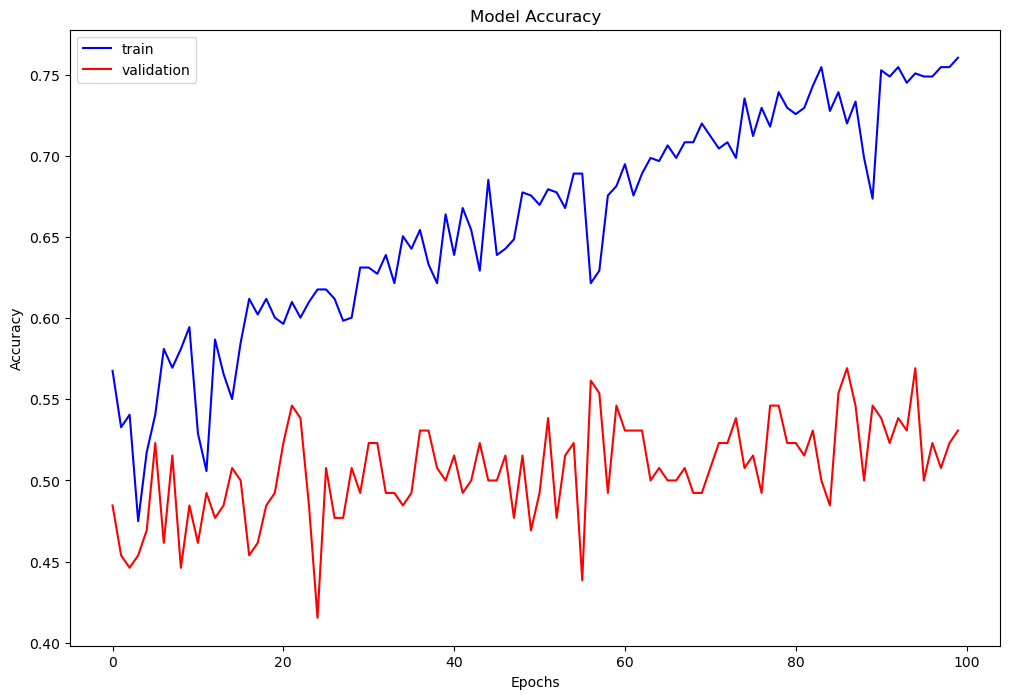

In [49]:
plt.figure(figsize=(12,8))
plt.plot(history.history["accuracy"], color = "b")
plt.plot(history.history["val_accuracy"], color = "r")
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["train", "validation"])

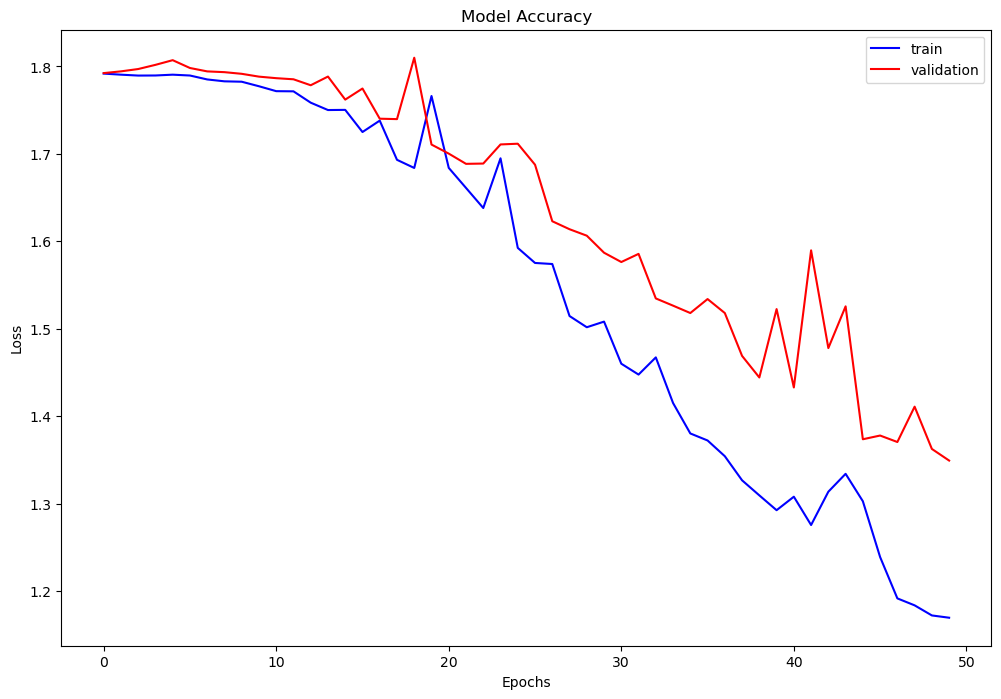

In [45]:
plt.figure(figsize=(12,8))
plt.plot(history.history["loss"], color = "b")
plt.plot(history.history["val_loss"], color = "r")
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["train", "validation"])

In [50]:
score = model.evaluate(X_test, y_test)
print("Accuracy: ", score[1]*100)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4932 - loss: 1.2587
Accuracy:  52.760738134384155


In [51]:
y_pred = model.predict(X_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [52]:
X_test.shape

(163, 224, 224, 3)

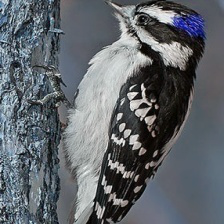

In [64]:
rand_img = np.random.randint(-1,163)
img = array_to_img(X_test[rand_img])
img

In [65]:
labels = lb.classes_
print(labels,"\n")
print("Original", labels[np.argmax(y_test[rand_img])])
print("Predicted", labels[np.argmax(y_pred[rand_img])])

[0 1 2 3 4 5] 

Original 3
Predicted 3


## Dropout